In [1]:
# Base Module of data processing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

from scipy.spatial.distance import pdist, squareform
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

In [3]:
# Set path
path_mac = "../../data/"
file_path = path_mac + "Wine_Quality_Data.csv"
# Get data
data=pd.read_csv(file_path, sep=',')

In [4]:
# Split data & y_data
x_data = data.drop(data.columns[len(data.columns)-1], axis=1)
y_data = data["color"].map({'red':0, "white":1})

In [50]:
# Split as train data and test data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=True)

In [51]:
# Train
model = LogisticRegression()
model = model.fit(x_train, y_train)
print(model)
# Test
prediction = model.predict(x_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


F-Score: 0.981
Accuracy:  0.9807692307692307
             precision    recall  f1-score   support

          0       0.96      0.96      0.96       317
          1       0.99      0.99      0.99       983

avg / total       0.98      0.98      0.98      1300



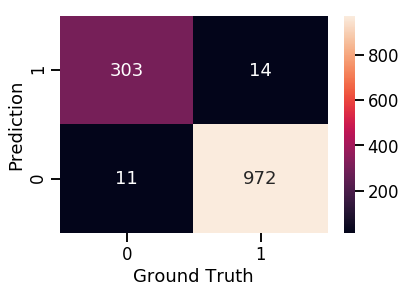

In [52]:
# Check Result
p,r,f,s = precision_recall_fscore_support(y_test, prediction, average='micro')
print("F-Score:", round(f,3))
print("Accuracy: ", accuracy_score(y_test, prediction))

print(classification_report(y_test, prediction))

labels = sorted(y_test.unique())
chart = pd.DataFrame(confusion_matrix(y_test, prediction),
                  columns=labels, index=labels)
sns.set_context('talk')
ax = sns.heatmap(chart, annot=True, fmt='d', xticklabels=True, yticklabels=True)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels[::-1])
ax.set_ylabel('Prediction')
ax.set_xlabel('Ground Truth');